# Predictive Maintenance of Turbofan Jet Engine: Exploratory Data Analysis


## 1. Data Inspection


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open dataset description README.md
with open("data/README.md", "r") as f:
    print(f.read())

Data Set: FD001
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trajectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trajectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trajectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine ï¿½ i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault conditi

For this assignment, we will be using **FD001** dataset since it is widely researched. Thus, it is suitable for benchmarking purposes.


In [3]:
# Define the columns of our dataset.
INDEX_COLUMNS = ["unit", "time_cycles"]
OP_SETTING_COLUMNS = ["op_setting_{}".format(i) for i in range(1, 4)]
SENSOR_COLUMNS = ["sensor_{}".format(i) for i in range(1, 22)]
col_names = INDEX_COLUMNS + OP_SETTING_COLUMNS + SENSOR_COLUMNS

In [4]:
# Load training data
train_data = pd.read_csv(
    "data/train_FD001.txt", sep="\s+", header=None, names=col_names
)
train_data.head()

,unit,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
# Load test data
test_data = pd.read_csv("data/test_FD001.txt", sep="\s+", header=None, names=col_names)
test_data.head()

,unit,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [6]:
# Load the true RUL values for the test data
test_rul = pd.read_csv("data/RUL_FD001.txt", sep="\s+", header=None, names=["rul"])

# Add a unit column to the test RUL
test_rul["unit"] = test_rul.index + 1
test_rul.head()

,rul,unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unit          20631 non-null  int64  
 1   time_cycles   20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     20631 non-nu

In [8]:
train_data.describe()

,unit,time_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## 2. Distribution of Engine Lifetime in Train Sets and Last Time Cycle in Test Sets


In [9]:
# Find the lifetime of each engine unit
train_units_lifetime = train_data.groupby("unit")["time_cycles"].max().reset_index()
test_units_lifetime = test_data.groupby("unit")["time_cycles"].max().reset_index()

# Add a column to indicate if the data is from the training or test set
train_units_lifetime["dataset"] = "train"
test_units_lifetime["dataset"] = "test"

units_lifetime = train_units_lifetime._append(test_units_lifetime, ignore_index=True)

In [10]:
units_lifetime.groupby("dataset")["time_cycles"].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
test,100.0,130.96,53.593479,31.0,88.75,133.5,164.25,303.0
train,100.0,206.31,46.342749,128.0,177.00,199.0,229.25,362.0


Text(0.5, 1.0, 'Distribution of Engine Unit Lifetime')

<Figure size 800x600 with 0 Axes>

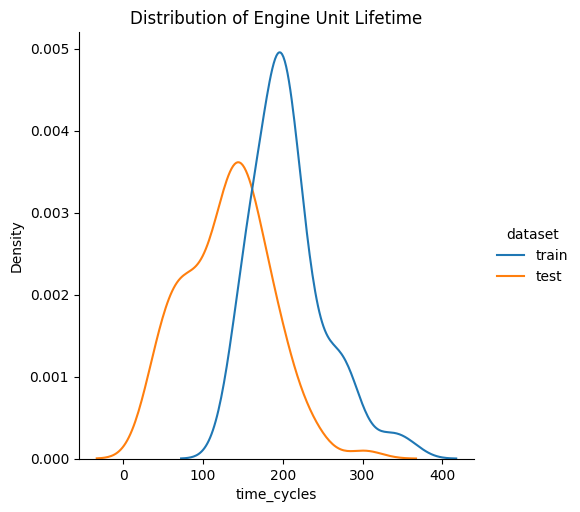

In [11]:
# Plot the distribution of the lifetime of the engine units
plt.figure(figsize=(8, 6))
sns.displot(units_lifetime, x="time_cycles", hue="dataset", kind="kde")
plt.title("Distribution of Engine Unit Lifetime")

Observations:

- Engine units in the test set have shorter lifetimes than train set.
- On average, engine lifetimes in the test set are 70 cycles shorter than train set.


## 3. Distribution of RUL in Train and Test Sets


In [12]:
def calculate_RUL(X, upper_threshold=None):
    lifetime = X.groupby(["unit"])["time_cycles"].transform(max)
    rul = lifetime - X["time_cycles"]

    if upper_threshold:
        rul = np.where(rul > upper_threshold, upper_threshold, rul)

    return rul

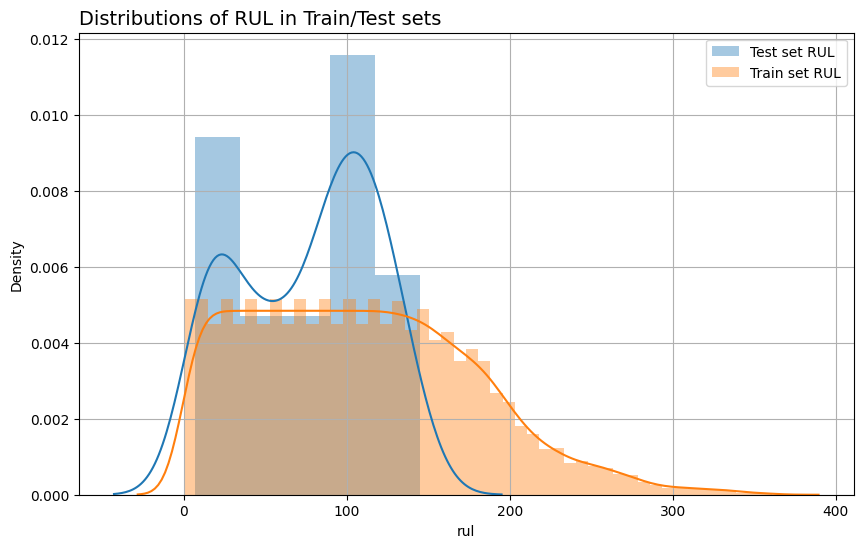

In [13]:
train_data["rul"] = calculate_RUL(train_data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Distributions of RUL in Train/Test sets", loc="left", size=14)
sns.distplot(test_rul["rul"], label="Test set RUL")
sns.distplot(train_data["rul"], label="Train set RUL")
ax.legend()
ax.grid()
plt.show()

Observations:

- As expected, the Train set contains units with RUL way higher than in Test set.
- This is because the Train set have the full lifetime data of an engine while the Test set only contains data until a period of time before its end of life.
- Hence, our target is to predict the RUL at the last cycle of each engine in the Test set.


To address this issue, we need to limit the maximum value of RUL. The motivation is that a degradation process will only be noticeable in the data after a unit has operated for some time.


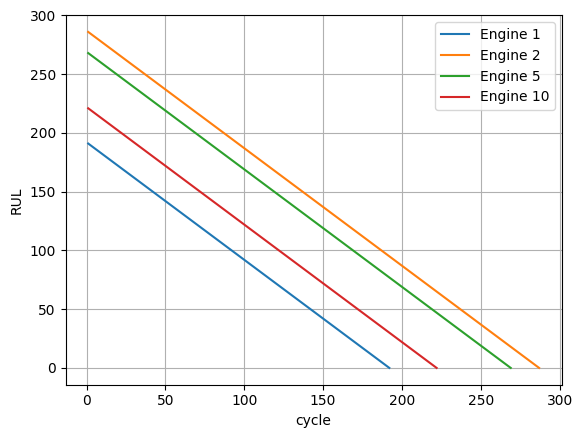

In [14]:
# Before applying limit
for _unit in [1, 2, 5, 10]:
    plt.plot(
        train_data[train_data["unit"] == _unit]["time_cycles"],
        train_data[train_data["unit"] == _unit]["rul"],
        label=f"Engine {_unit}",
    )

plt.legend()
plt.xlabel("cycle")
plt.ylabel("RUL")
plt.grid()
plt.show()

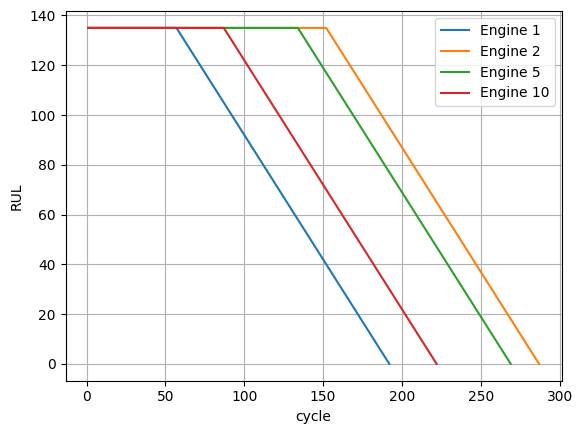

In [15]:
# After applying limit
train_data["rul"] = calculate_RUL(train_data, upper_threshold=135)

for _unit in [1, 2, 5, 10]:
    plt.plot(
        train_data[train_data["unit"] == _unit]["time_cycles"],
        train_data[train_data["unit"] == _unit]["rul"],
        label=f"Engine {_unit}",
    )

plt.legend()
plt.xlabel("cycle")
plt.ylabel("RUL")
plt.grid()
plt.show()

## 4. Wear / Degradation Patterns


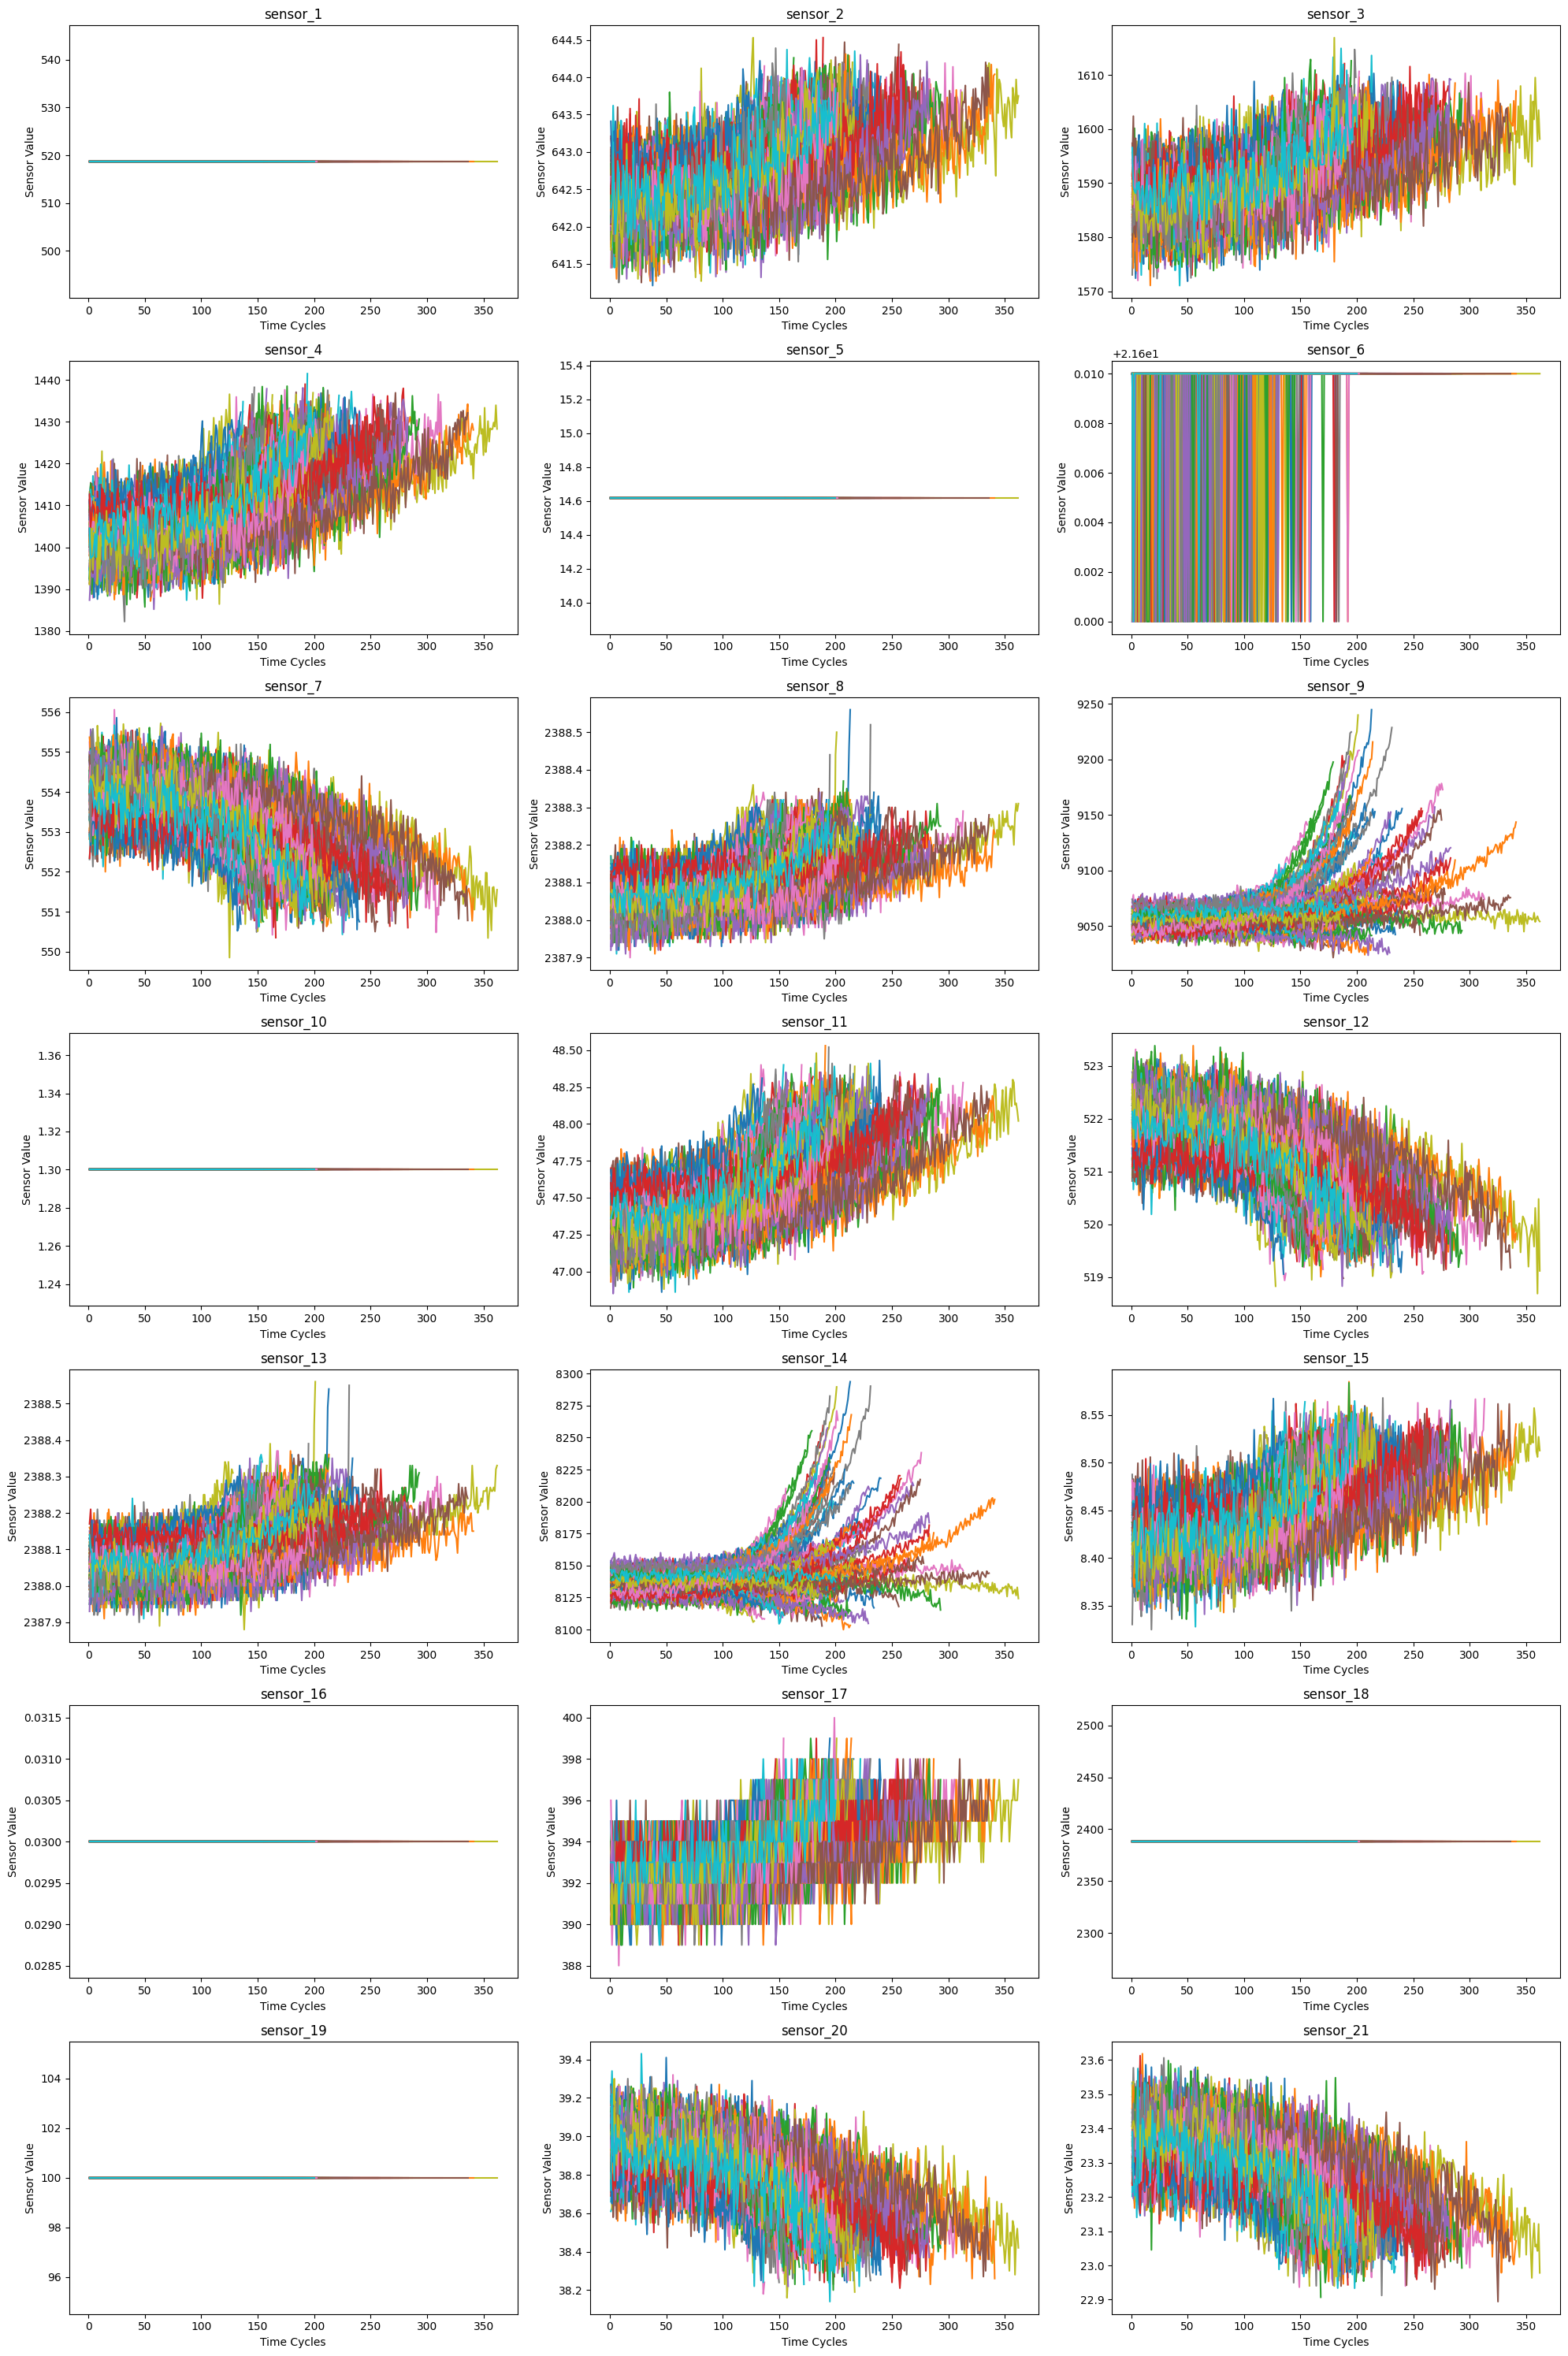

In [16]:
fig, axes = plt.subplots(7, 3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(SENSOR_COLUMNS):
    for unit in train_data["unit"].unique():
        unit_data = train_data[train_data["unit"] == unit]
        axes[i].plot(unit_data["time_cycles"], unit_data[col])
    axes[i].set_title(SENSOR_COLUMNS[i])
    axes[i].set_xlabel("Time Cycles")
    axes[i].set_ylabel("Sensor Value")

plt.tight_layout()
plt.show()

Observations:

- Sensor 1, 5, 10, 16, 18, 19 are constant throughout cycles.
- Due to low variance, they are considered useless features and can be dropped.
- For others, we can really see how the sensor values changed with respect to time cycles. Some increase and some decrease.


## 5. Difference between Each Unit of Engines


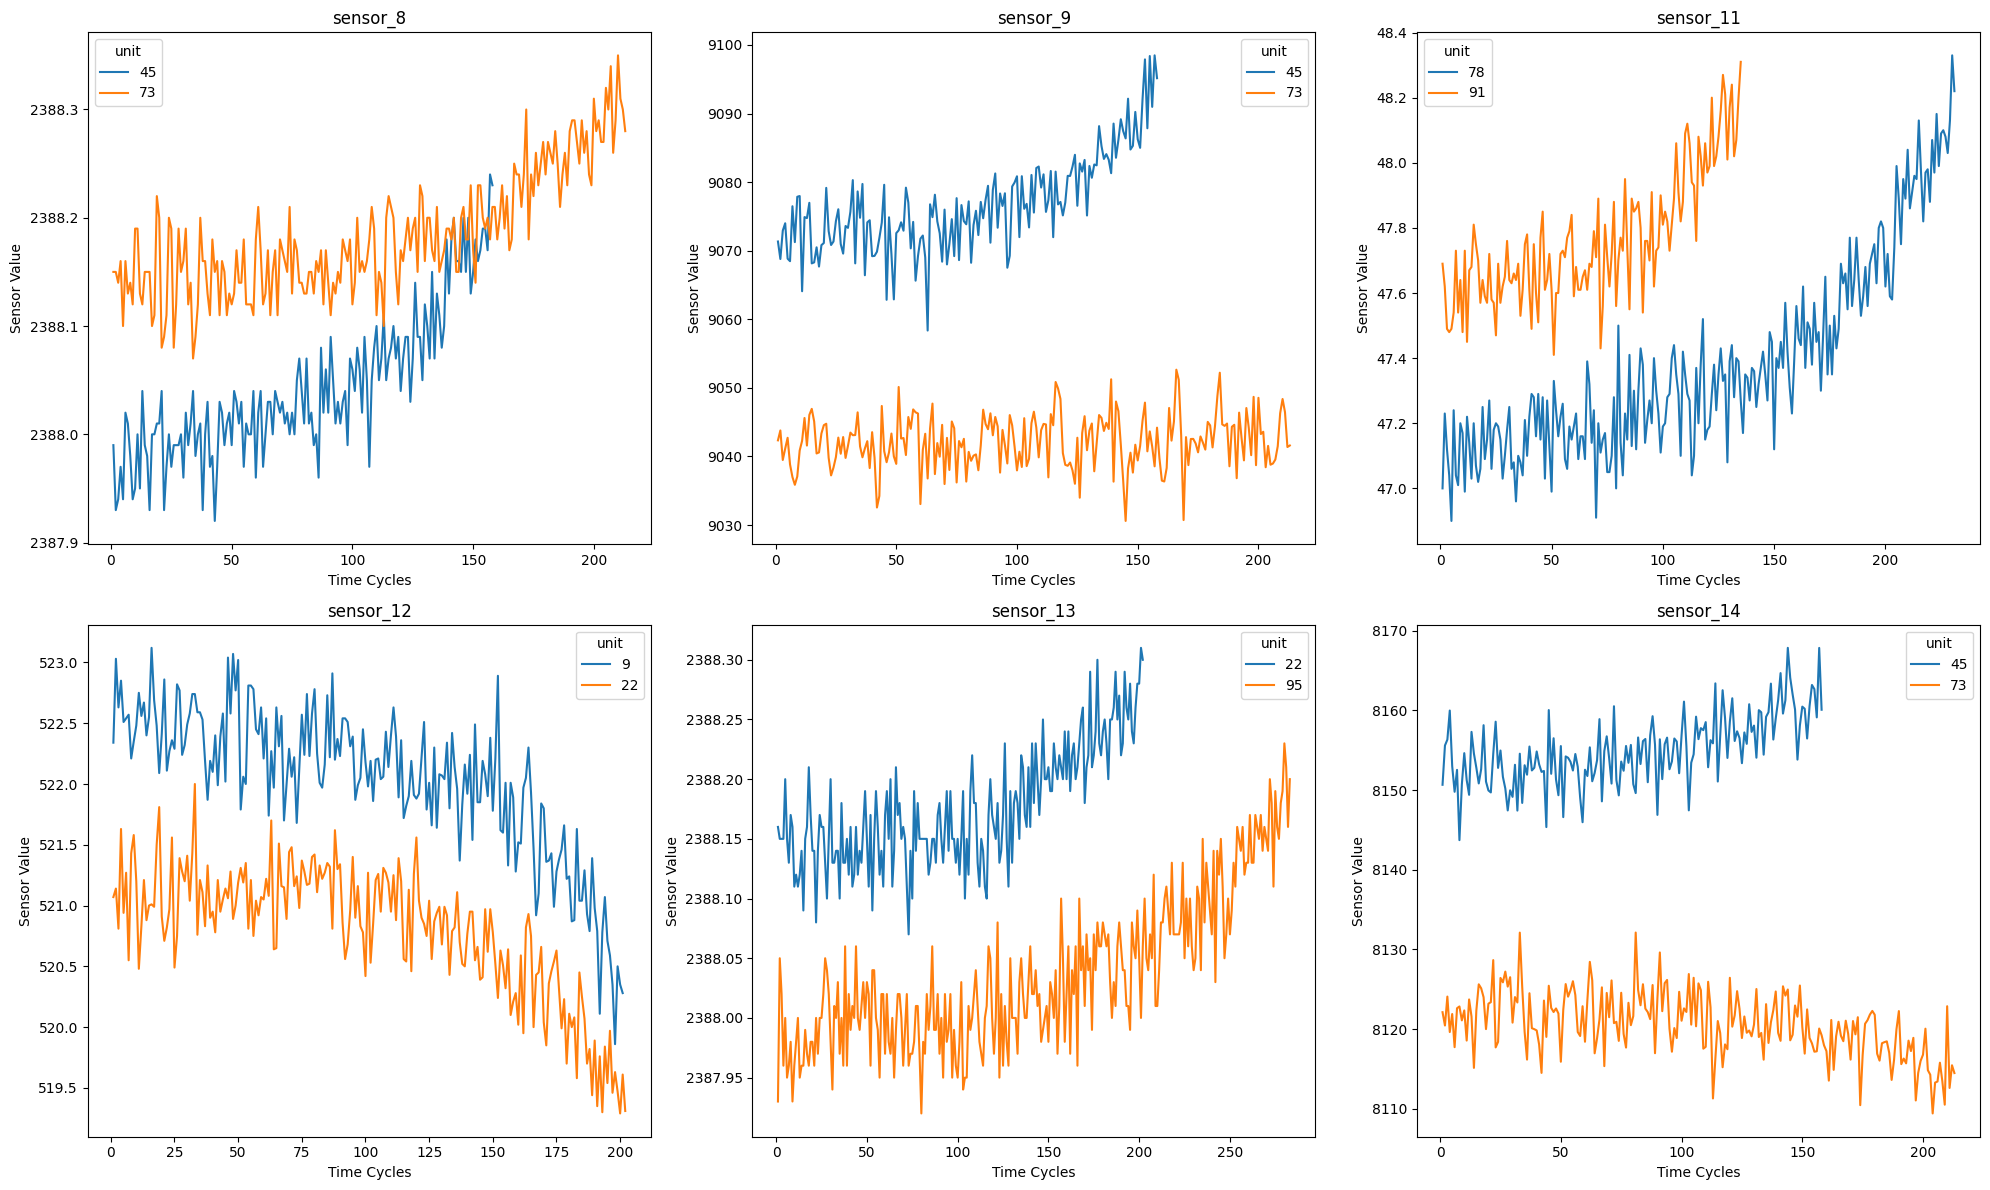

In [17]:
SELECTED_SENSORS = [
    "sensor_8",
    "sensor_9",
    "sensor_11",
    "sensor_12",
    "sensor_13",
    "sensor_14",
]

first_avg_values = (
    train_data[train_data["time_cycles"] <= 20]
    .groupby("unit")[SELECTED_SENSORS]
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(2, 3, figsize=(20, 12))
for i, sensor in enumerate(SELECTED_SENSORS):
    avg_sorted = first_avg_values.sort_values(sensor)
    engine_a, engine_b = avg_sorted["unit"].iloc[0], avg_sorted["unit"].iloc[-1]
    sns.lineplot(
        data=train_data[train_data["unit"].isin([engine_a, engine_b])],
        x="time_cycles",
        y=sensor,
        hue="unit",
        ax=ax.flatten()[i],
        palette="tab10",
    )
    ax.flatten()[i].set_title(sensor)
    ax.flatten()[i].set_xlabel("Time Cycles")
    ax.flatten()[i].set_ylabel("Sensor Value")

plt.tight_layout()
plt.show()

Observations:

- We can see the difference between engines based on the sensor time series.
- This suggests that we might need to scale the sensor time series with respect to start of every individual engines time series.
- Scaling with respect to individual engines starting values allows us to bring all the engines time series to the same scale.
